In [2]:
import random as random
import matplotlib.pyplot as plt
import numpy as np

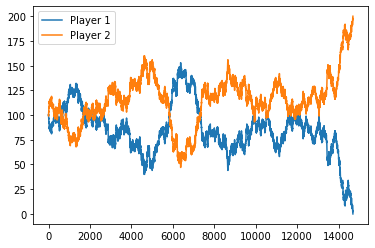

In [3]:

def ruin(g1, g2, p1):
    current = 0
    seq1 = []
    seq2 = []
    while(current < g1 and current > -g2):
        seq1.append(g1 - current)
        seq2.append(g2 + current)
        if(random.random() < p1):
            current -= 1
        else:
            current += 1
    seq1.append(g1 - current)
    seq2.append(g2 + current)
    return (seq1, seq2)
res = ruin(100, 100, 0.5)
arr = [i for i in range(len(res[0]))]
plt.plot(arr, res[0], label = 'Player 1')
plt.plot(arr, res[1], label = 'Player 2')
plt.legend()

Player 1 win %: 0.483


Text(0.5, 1.0, "Gambler's Ruin length distributions for even M1=M2=100")

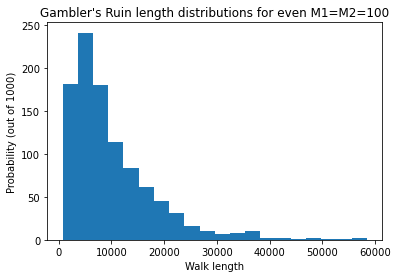

In [9]:
def sim_game(numsims, g1, g2, p1):
    lengths = []
    p1wins = 0
    for i in range(numsims):
        res = ruin(g1, g2, p1)
        lengths.append(len(res[0]))
        if(res[0][len(res[0]) - 1] != 0):
            p1wins += 1
    print(f"Player 1 win %: {p1wins / numsims}")
    plt.hist(lengths, 20)
sim_game(1000, 100, 100, 0.5)
plt.xlabel("Walk length")
plt.ylabel("Probability (out of 1000)")
plt.title("Gambler's Ruin length distributions for even M1=M2=100")

Text(0.5, 1.0, 'Distance and Manhattan Distance distributions for 2d random walks')

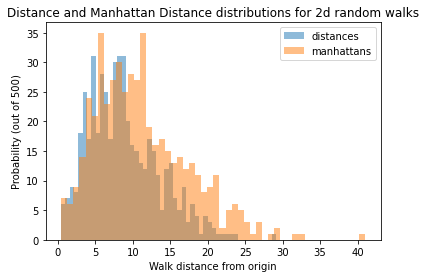

In [11]:
def walktwo(l):
    x = 0
    y = 0
    xs = []
    ys = []
    for i in range(l):
        xs.append(x)
        ys.append(y)
        res = random.random() * 2 * np.pi
        x += np.cos(res)
        y += np.sin(res)
    return (xs, ys)
def getdist(walk):
    return np.sqrt(walk[0][len(walk[0]) -  1] ** 2 + walk[1][len(walk[1]) - 1] ** 2)
def getmanhattan(walk):
    return np.abs(walk[0][len(walk[0]) - 1]) + np.abs(walk[1][len(walk[1]) - 1])
def plotdists(numwalks, length):
    ds = []
    mds = []
    for i in range(numwalks):
        res = walktwo(length)
        ds.append(getdist(res))
        mds.append(getmanhattan(res))
    plt.hist(ds, 50, label = "distances", alpha = 0.5)
    plt.hist(mds, 50, label = "manhattans", alpha = 0.5)
    plt.legend()
plotdists(500, 100)
plt.xlabel("Walk distance from origin")
plt.ylabel("Probability (out of 500)")
plt.title("Distance and Manhattan Distance distributions for 2d random walks")

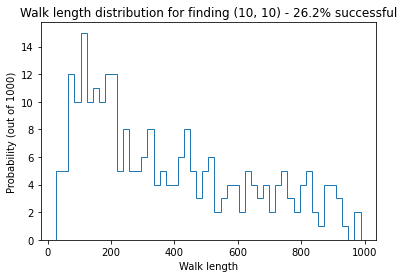

In [7]:
def targetTwo(x, y, precision, maxlen):
    x1 = 0
    y1 = 0
    length = 0
    while(((x - x1) ** 2 + (y - y1) ** 2) > precision):
        if(length > maxlen):
            return -1 # not found
        res = random.random() * 2 * np.pi
        x1 += np.cos(res)
        y1 += np.sin(res)
        length += 1
    return length
def getTargets(numwalks, x, y, precision, maxlen):
    times = []
    fails = 0
    for i in range(numwalks):
        res = targetTwo(x, y, precision, maxlen)
        if(res == -1):
            fails += 1
        else:
            times.append(res)
    plt.hist(times, 50, histtype = 'step')
    plt.title(f"Walk length distribution for finding ({x}, {y}) - {(numwalks - fails) * 100 / numwalks}% successful")
    plt.xlabel("Walk length")
    plt.ylabel(f"Probability (out of {numwalks})")
getTargets(1000, 10, 10, 5, 1000)

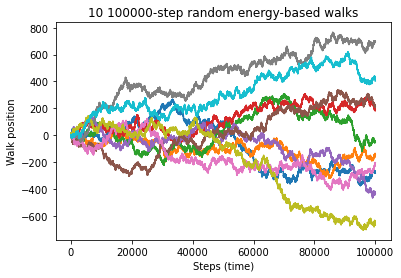

In [70]:
# energy landscape

def walkEnergy(ratio, temp, numSteps):
    current = 0
    positions = []
    for i in range(numSteps):
        positions.append(current)
        ce = current % (ratio + 1)
        proposed = random.choice([-1, 1])
        ne = (current + proposed) % (ratio + 1)
        if ne >= ce:
            prob = np.e ** ((ce - ne) / temp)
            if random.random() > prob:
                proposed = 0
        current += proposed
    return positions
def graphWalks(numWalks, numSteps, ratio, temp):
    for i in range(numWalks):
        res = walkEnergy(ratio, temp, numSteps)
        plt.plot(range(numSteps), res, label = f"Line {i + 1}")
    plt.xlabel("Steps (time)")
    plt.ylabel("Walk position")
    plt.title(f"{numWalks} {numSteps}-step random energy-based walks")
graphWalks(10, 100000, 2, 10)

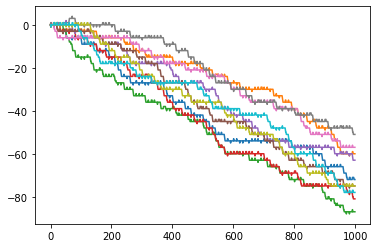

In [72]:
def kickedWalk(ratio, numSteps):
    current = 0
    steps = []
    for i in range(numSteps):
        steps.append(current)
        choice = random.choice([-1, 1])
        de = ((current + choice) % (ratio + 1)) - (current % (ratio + 1))
        if i % 10 == 0 or de < 0:
            current += choice
    return steps
def graphKicks(numwalks, ratio, numsteps):
    for i in range(numwalks):
        res = kickedWalk(ratio, numsteps)
        plt.plot(range(numsteps), res)
graphKicks(10, 2, 1000)